In [1]:
from glob import glob
import os
import natsort
from tqdm import tqdm
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

255


array([[247., 250., 251., ..., 247., 247., 247.],
       [246., 249., 250., ..., 247., 247., 248.],
       [245., 249., 250., ..., 247., 247., 248.],
       ...,
       [242., 243., 246., ..., 243., 243., 242.],
       [240., 241., 242., ..., 243., 244., 244.],
       [241., 240., 238., ..., 242., 243., 243.]])

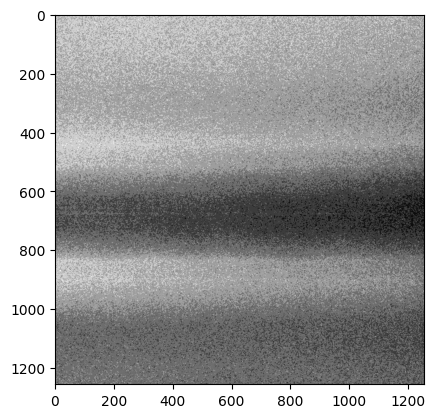

In [5]:
image = cv2.imread('/home/VirtualFlaw/Data/Preprocess_contrast/22C042-06-003/22C042-06-003-1st-1-(1)-15-R-IP.jpg', cv2.IMREAD_GRAYSCALE)
print(np.max(image))
image = np.where(image < np.percentile(image, 0.1), np.mean(image), image)

plt.imshow(image, cmap='gray')

전체 이미지에 대해서 IP 불량을 합성해야함.
필요한 정보 : min, max 

In [75]:
df = pd.read_csv('/home/VirtualFlaw/Hyun/src/Image_Info.csv', index_col=0)
df2 = pd.DataFrame(columns=['category', 'min', 'max', 'depth', 'thickness'], index=df.index)
df2.dropna(inplace=True)

In [76]:
image_list = glob("/home/VirtualFlaw/Hyun/Data/Flaw/0pixel_padding" + '/**', recursive=True)
print(len(image_list))
for i in range(len(image_list)):
    # if i is not image file, skip
    if not os.path.isfile(image_list[i]):
        continue
    image = cv2.imread(image_list[i])
    file_name = os.path.basename(image_list[i])
    category = file_name.split("-")[0] + "-" + file_name.split("-")[1] + "-" + file_name.split("-")[2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    df2.loc[file_name, 'min'] = image.min()
    df2.loc[file_name, 'max'] = image.max()
    df2.loc[file_name, 'depth'] = image.max() - image.min()
    df2.loc[file_name, 'category'] = category

241


In [82]:
for i in range(len(df2)):
    category = df2.iloc[i, 0]
    if category in df.index:
        df2.loc[df2.index[i], 'thickness'] = df.loc[category, 'thickness']

In [83]:

df2.to_csv('/home/VirtualFlaw/Hyun/src/Image_Info2.csv')

In [ ]:
image_list = os.listdir(f"/home/VirtualFlaw/Data/Raw_jpg/New/")
image_list_2 = os.listdir(f"/home/VirtualFlaw/Data/Raw_jpg/ACC")
image_list_3 = os.listdir(f"/home/VirtualFlaw/Data/Raw_jpg/REJ")
image_list = image_list + image_list_2 + image_list_3
image_category_list = []
for i in range(len(image_list)):
    image_category_list.append(image_list[i].split("-")[0] + "-" + image_list[i].split("-")[1] + "-" + image_list[i].split("-")[2])
image_category_list = list(set(image_category_list))


